#### Problem Statement 1: The data (sample) were collected in São Paulo — Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption based on the features that contain climate conditions.


In [1]:
# Importing Libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# Loading Data 

df = pd.read_csv('Assignment 4 Dataset\Consumo_cerveja.csv')

In [ ]:
df.head(9)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886


: 

In [ ]:
df.shape

(941, 7)

: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


: 

Rectify the data of the first four columns
Hint: Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura
Maxima (C)', and 'Precipitac’
Fix the following errors present in these features


In [ ]:
# Checking for null  values Handle null
df.isnull().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

: 

In [ ]:
# Droping Null Values
df.dropna(inplace=True)

: 

: 

In [ ]:
# Change the "," in the temperature and precipitacao columns to "."
df[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']] = df[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']].replace({',':'.'}, regex=True)

: 

In [ ]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


: 

Create new features using the 'Data' feature and the make 'Data' column as index
Hint: Create a new feature 'Month' from the dates, consisting of the month of the year.
Create a new feature 'Day' from the dates, consisting of the day of the week.
Set values from the 'Data' column as indexes. Use code snippet:
df1.set_index('Data',inplace=True)

In [ ]:
# Convert 'Data' column to datetime format
df['Data'] = pd.to_datetime(df['Data'])

: 

In [ ]:
# Create new features 'Month' and 'Day'
df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.day_name()

: 

In [ ]:
# Set 'Data' column as the index
df.set_index('Data', inplace=True)

: 

In [ ]:
df.head(5)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,27.3,23.9,32.5,0,0.0,25.461,1,Thursday
2015-01-02,27.02,24.5,33.5,0,0.0,28.972,1,Friday
2015-01-03,24.82,22.4,29.9,0,1.0,30.814,1,Saturday
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1,Sunday
2015-01-05,23.82,21,28.3,0,0.0,28.900,1,Monday


: 

Handling Duplicate values

In [ ]:
df.duplicated().sum()

0

: 

Check the data type of the features and convert them to the appropriate data type 

In [ ]:
df.dtypes

Temperatura Media (C)           object
Temperatura Minima (C)          object
Temperatura Maxima (C)          object
Precipitacao (mm)               object
Final de Semana                float64
Consumo de cerveja (litros)    float64
Month                            int32
Day                             object
dtype: object

: 

In [ ]:
df[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']] = df[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']].astype(float)

: 

In [ ]:
df.dtypes

Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)    float64
Month                            int32
Day                             object
dtype: object

: 

Analyze features with outlier values 

Finding outlier

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[['Temperatura Media (C)', 'Temperatura Minima (C)','Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana','Consumo de cerveja (litros)']].quantile(0.25)
Q3 = df[['Temperatura Media (C)', 'Temperatura Minima (C)','Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana','Consumo de cerveja (litros)']].quantile(0.75)

: 

In [ ]:
# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

: 

In [ ]:
upper_bound

Temperatura Media (C)          29.6700
Temperatura Minima (C)         26.0500
Temperatura Maxima (C)         37.8000
Precipitacao (mm)               8.0000
Final de Semana                 2.5000
Consumo de cerveja (litros)    38.5655
dtype: float64

: 

In [ ]:
lower_bound

Temperatura Media (C)          12.6300
Temperatura Minima (C)          8.8500
Temperatura Maxima (C)         15.4000
Precipitacao (mm)              -4.8000
Final de Semana                -1.5000
Consumo de cerveja (litros)    12.0735
dtype: float64

: 

In [ ]:
# Identify outliers
outliers = df[['Temperatura Media (C)', 'Temperatura Minima (C)','Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana','Consumo de cerveja (litros)']][(df[['Temperatura Media (C)', 'Temperatura Minima (C)','Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana','Consumo de cerveja (litros)']] < lower_bound) | (df[['Temperatura Media (C)', 'Temperatura Minima (C)','Temperatura Maxima (C)', 'Precipitacao (mm)','Final de Semana','Consumo de cerveja (litros)']] > upper_bound)]

: 

In [ ]:
outliers.isna().sum()

Temperatura Media (C)          365
Temperatura Minima (C)         365
Temperatura Maxima (C)         364
Precipitacao (mm)              301
Final de Semana                365
Consumo de cerveja (litros)    365
dtype: int64

: 

Plot and analyze the correlation 

In [ ]:
df.columns

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)', 'Month', 'Day'],
      dtype='object')

: 

In [ ]:
new_df = df.drop(['Day'], axis=1)

: 

In [ ]:
new_df.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615,-0.103169
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509,-0.172923
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672,-0.074866
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784,0.007089
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981,-0.006526
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000,0.039908
Month,-0.103169,-0.172923,-0.074866,0.007089,-0.006526,0.039908,1.000000


: 

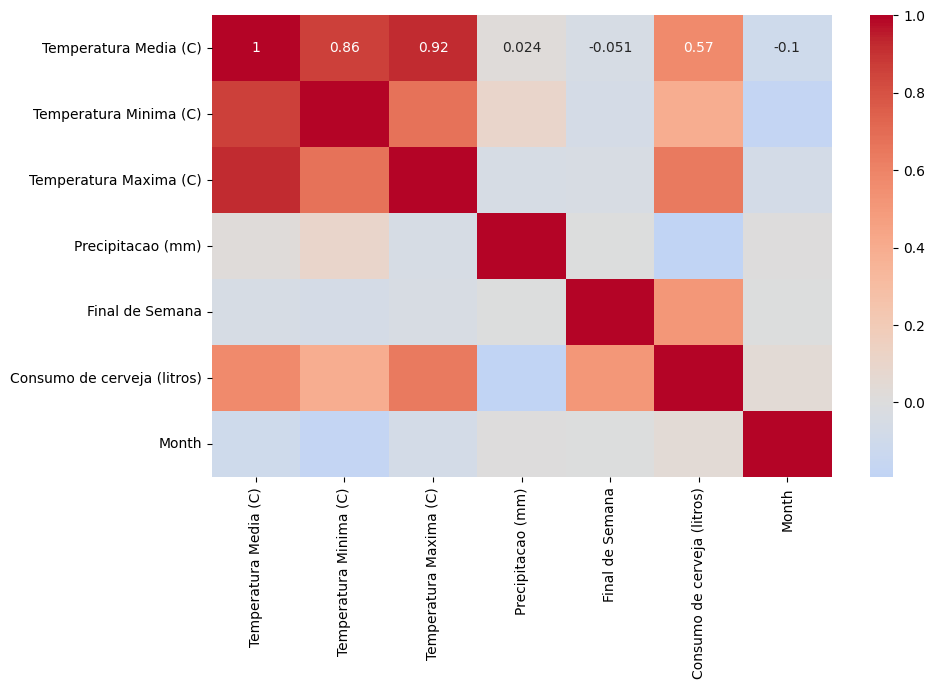

: 

In [ ]:
# Plotting the Correlation

plt.figure(figsize=(10,6))   
sns.heatmap(new_df.corr(), center=0, cmap='coolwarm', annot=True)
plt.show()

Split the dataset for training and testing

In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Apply Label Encoding to the 'Day' column
df['Day_LabelEncoded'] = label_encoder.fit_transform(df['Day'])
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day,Day_LabelEncoded
Data,,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1,Thursday,4
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1,Friday,0
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1,Saturday,2
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1,Sunday,3
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1,Monday,1


: 

In [ ]:
# splitting into independent and dependent variables or columns
x = df.drop(['Consumo de cerveja (litros)', 'Day'], axis=1)
y = df['Consumo de cerveja (litros)']

: 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

: 

Train a linear regression model and print the intercept and coefficients

In [ ]:
model_lin_reg = LinearRegression()

: 

In [ ]:
model_lin_reg.fit(x_train,y_train)

LinearRegression()

: 

In [ ]:
print("The intercept for this Multiple Linear Regression model on the dataset is",
    model_lin_reg.intercept_)

The intercept for this Multiple Linear Regression model on the dataset is 5.627765708915867


: 

In [ ]:
print("The regression co-efficients of the Multiple Linear Regression model are:")
print("=========================================================================")
print(model_lin_reg.coef_)

The regression co-efficients of the Multiple Linear Regression model are:
[-0.03532467  0.06136919  0.65820093 -0.05707942  5.09347326  0.11189939
 -0.01054885]


: 

Evaluate the model using the R2 score, mean absolute error, and root mean squared
error

In [ ]:
y_test_pred = model_lin_reg.predict(x_test) # pass only the test set features
y_test_pred

array([22.09597259, 28.60227663, 28.50500389, 24.93319857, 24.49779433,
       32.05780305, 24.49537277, 27.97009297, 19.85265586, 28.20665064,
       20.87750058, 23.19020638, 28.40790007, 25.72474369, 25.77622275,
       24.04426136, 21.26145965, 28.38028897, 25.15051449, 22.91299035,
       27.59113723, 28.71049561, 28.53065368, 28.18336679, 27.61193365,
       20.69075849, 23.54697484, 28.5080303 , 24.95972333, 24.88095381,
       19.6379506 , 23.35378167, 27.58110601, 29.15057019, 27.19510899,
       25.45918047, 25.4451377 , 18.72906684, 28.75224076, 25.11441527,
       26.67199073, 31.40251595, 29.15069849, 29.65874595, 26.51344088,
       22.84310223, 29.03234106, 24.38494802, 29.26591203, 26.77979582,
       23.24238274, 29.09394136, 20.33239301, 29.63666713, 24.23622192,
       25.35820465, 31.57457654, 26.14071453, 25.35757518, 22.22149038,
       22.07345502, 20.9296644 , 24.82951527, 30.12823712, 21.71159032,
       25.62752839, 24.11628913, 28.78617609, 30.12775938, 23.57

: 

In [ ]:
actual_vs_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_pred})
actual_vs_pred_df

,Actual,Predicted
Data,,
2015-04-17,21.593,22.095973
2015-09-17,33.930,28.602277
2015-02-15,24.968,28.505004
2015-01-27,29.972,24.933199
2015-03-20,24.213,24.497794
...,...,...
2015-08-08,31.310,30.127759
2015-06-09,21.327,23.574656
2015-03-16,20.903,24.392594


: 

In [ ]:
print("The R2 score of the MLR model on the test dataset is:")
print(model_lin_reg.score(x_test,y_test))

The R2 score of the MLR model on the test dataset is:
0.6759044097187614


: 

In [ ]:
print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mean_squared_error(y_test, y_test_pred))) #actual values,predicted values

The RMSE value of the MLR model on the test dataset is: 
2.398063770186917


: 

Using Scaled variables

In [ ]:
min_max_scale =  MinMaxScaler(feature_range=(0,1))
x_scaled = min_max_scale.fit_transform(x)

: 

In [ ]:
x_sc_train,x_sc_test,y_sc_train,y_sc_test = train_test_split(x_scaled,y,test_size=0.2, random_state=0)

: 

In [ ]:
model_lin_reg_scaled = LinearRegression()

: 

In [ ]:
model_lin_reg_scaled.fit(x_sc_train, y_sc_train)

LinearRegression()

: 

In [ ]:
print("The intercept for this Multiple Linear Regression model scaled on the dataset is",
    model_lin_reg_scaled.intercept_)

The intercept for this Multiple Linear Regression model scaled on the dataset is 15.478403827160422


: 

In [ ]:
print("The R2 score of the MLR model scaled on the test dataset is:")
print(model_lin_reg_scaled.score(x_sc_test,y_sc_test))

The R2 score of the MLR model scaled on the test dataset is:
0.675904409718761


: 

#### Problem Statement 2: You are provided with the California housing dataset. Based on the given parameters of a house, predict its price.


Load the data, check its shape and check for null values

In [ ]:
# Loading Data
house_df = pd.read_csv('Assignment 4 Dataset\california_housing_train.csv')

: 

In [ ]:
house_df.shape

(17000, 9)

: 

In [ ]:
house_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

: 

Split the dataset for training and testing - 1000 instances for testing

In [ ]:
x = house_df.drop(['median_house_value'], axis=1)
y = house_df['median_house_value']

: 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.0588, random_state=0)

: 

In [ ]:
x_test.shape

(1000, 8)

: 

Train the model using sklearn (Apply linear regression to train a model for prediction)

In [ ]:
house_data_model = LinearRegression()

: 

In [ ]:
house_data_model.fit(x_train, y_train)

LinearRegression()

: 

Predict the prices on test data and evaluate the model by r2 score and mean absolute
error

In [ ]:
y_test_pred_val = house_data_model.predict(x_test)

: 

In [ ]:
house_data_model.score(x_test, y_test)

0.6140658023056087

: 

In [ ]:
print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mean_squared_error(y_test, y_test_pred_val))) 

The RMSE value of the MLR model on the test dataset is: 
73413.98143544076


: 

Find coefficient and intercept using the trained model

In [ ]:
print("The intercept for this Multiple Linear Regression model on the dataset is",
    house_data_model.intercept_)

The intercept for this Multiple Linear Regression model on the dataset is -3619591.677537241


: 

In [ ]:
print("The regression co-efficients of the Multiple Linear Regression model are:")
print("=========================================================================")
print(house_data_model.coef_)

The regression co-efficients of the Multiple Linear Regression model are:
[-4.30861845e+04 -4.28117411e+04  1.17167793e+03 -8.76656690e+00
  1.20394389e+02 -3.74535982e+01  4.17800068e+01  4.06517876e+04]


: 

#### Problem Statement 3: You are provided with the medical cost dataset. You need to predict individual medical costs billed by health insurance.

Load the data, check its shape and check for null values

In [ ]:
insure_df = pd.read_csv('Assignment 4 Dataset\insurance.csv')

: 

In [ ]:
insure_df.shape

(1338, 7)

: 

In [ ]:
insure_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

: 

Convert categorical features to numerical values (Use One-Hot Encoding)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

: 

In [ ]:
insure_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

: 

In [ ]:
# Create a OneHotEncoder instance
one_hot_encoder = OneHotEncoder()

# Fit and transform the categorical feature
encoded_data = one_hot_encoder.fit_transform(insure_df[['sex','smoker','region']])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=one_hot_encoder.get_feature_names_out(['sex','smoker','region']))

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([insure_df.drop(['sex','smoker','region'], axis=1), encoded_df], axis=1)

: 

In [ ]:
data_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


: 

Split the dataset for training and testing

In [ ]:
x = data_encoded.drop(['charges'], axis=1)
y = data_encoded['charges']

: 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8, random_state=21)

: 

Train the model using sklearn – Linear Regression

In [ ]:
insure_model_reg = LinearRegression()

: 

In [ ]:
insure_model_reg.fit(x_train,y_train)

LinearRegression()

: 

Find the intercept and coefficient from the trained model

In [ ]:
print("The intercept for this Multiple Linear Regression model on the dataset is",
    insure_model_reg.intercept_)

The intercept for this Multiple Linear Regression model on the dataset is -646.9828984909363


: 

In [ ]:
print("The regression co-efficients of the Multiple Linear Regression model are:")
print("=========================================================================")
print(insure_model_reg.coef_)

The regression co-efficients of the Multiple Linear Regression model are:
[   258.88534208    337.48080714    481.1448713     100.59917336
   -100.59917336 -12017.81688871  12017.81688871    791.71450198
     84.67512434   -556.04639168   -320.34323464]


: 

Predict the prices of test data and evaluate the model using calculated r2 score and root
mean squared error

In [ ]:
y_test_pred = insure_model_reg.predict(x_test)

: 

In [ ]:
actual_vs_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_pred})
actual_vs_pred_df

,Actual,Predicted
831,5266.36560,5560.850882
1287,5472.44900,5657.226243
1259,10197.77220,9512.356786
827,20773.62775,31320.866125
933,7348.14200,10678.369037
...,...,...
605,9283.56200,11591.000964
395,7526.70645,5928.683325
14,39611.75770,31922.159066
803,38792.68560,29830.512223


: 

In [ ]:
print("The R2 score of the MLR model on the test dataset is:")
print(insure_model_reg.score(x_test,y_test))

The R2 score of the MLR model on the test dataset is:
0.7333045867702144


: 

In [ ]:
print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

The RMSE value of the MLR model on the test dataset is: 
6084.908179066211


: 

#### Problem Statement 4: You are provided with the '50_Startups' data. Using the given features, you must predict the profit of these startups

Load the data, check its shape and check for null values

In [ ]:
startup_df = pd.read_csv('Assignment 4 Dataset\\50_Startups.csv')

: 

In [ ]:
startup_df.shape

(50, 5)

: 

In [ ]:
startup_df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

: 

Convert categorical features to numerical values using Label Encoder

In [ ]:
encoder = LabelEncoder()

startup_df['StateEncoded'] = encoder.fit_transform(startup_df['State'])



: 

In [ ]:
startup_df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit,StateEncoded
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,2
4,142107.34,91391.77,366168.42,Florida,166187.94,1


: 

Split the dataset for training and testing

In [ ]:
x = startup_df.drop(['State', 'Profit'], axis=1)
y = startup_df['Profit']

: 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=45)

: 

Train the model using sklearn (linear regression), also find the intercept and coefficient
from the trained model 

In [ ]:
model_1 = LinearRegression()

: 

In [ ]:
model_1.fit(x_train,y_train)

LinearRegression()

: 

In [ ]:
print("The intercept for this Multiple Linear Regression model on the dataset is",
    model_1.intercept_)

The intercept for this Multiple Linear Regression model on the dataset is 50210.1426105952


: 

In [ ]:
print("The regression co-efficients of the Multiple Linear Regression model are:")
print("=========================================================================")
print(model_1.coef_)

The regression co-efficients of the Multiple Linear Regression model are:
[ 8.05615486e-01 -2.30901906e-02  2.63672444e-02 -1.12181255e+02]


: 

Predict the profits of test data and evaluate the model using r2 score and mean squared
error

In [ ]:
y_test_pred = model_1.predict(x_test)

: 

In [ ]:
actual_vs_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_pred})
actual_vs_pred_df

,Actual,Predicted
47,42559.73,47083.109211
7,155752.60,160247.571376
2,191050.39,182133.457628
9,149759.96,155102.734011
5,156991.12,163490.766412


: 

In [ ]:
print("The R2 score of the MLR model on the test dataset is:")
print(model_1.score(x_test,y_test))

The R2 score of the MLR model on the test dataset is:
0.9849983788841027


: 

In [ ]:
print("The RMSE value of the MLR model on the test dataset is: ")
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

The RMSE value of the MLR model on the test dataset is: 
6180.097858430439


: 

Regularize the model using Ridge Regression and find the Score 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

: 

In [ ]:
ridgeReg = Ridge(alpha=0.05)

ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
ridgeReg.score(x_test,y_test)

0.9849984818843995

: 

Regularize the model using Lasso Regression and find the Score

In [ ]:
lassoReg = Lasso(alpha=0.05)

lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_test)
lassoReg.score(x_test,y_test)

0.9849984202684321

: 

## **The END**